In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv("../Data/retail_price.csv")
df.head()


,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [10]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [11]:
df = df[
    [
        "month_year",
        "product_id",
        "product_category_name",
        "qty",
        "unit_price",
        "total_price",
        "freight_price"
    ]
]
df.head()


,month_year,product_id,product_category_name,qty,unit_price,total_price,freight_price
0,01-05-2017,bed1,bed_bath_table,1,45.95,45.95,15.100000
1,01-06-2017,bed1,bed_bath_table,3,45.95,137.85,12.933333
2,01-07-2017,bed1,bed_bath_table,6,45.95,275.70,14.840000
3,01-08-2017,bed1,bed_bath_table,4,45.95,183.80,14.287500
4,01-09-2017,bed1,bed_bath_table,2,45.95,91.90,15.100000


In [12]:
df = df.rename(columns={
    "month_year": "Date",
    "product_id": "Product",
    "product_category_name": "Category",
    "qty": "Quantity",
    "unit_price": "Unit_Price",
    "total_price": "Revenue",
    "freight_price": "Freight_Cost"
})


In [13]:
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

df.head()


,Date,Product,Category,Quantity,Unit_Price,Revenue,Freight_Cost,Month,Year
0,2017-05-01,bed1,bed_bath_table,1,45.95,45.95,15.100000,5,2017
1,2017-06-01,bed1,bed_bath_table,3,45.95,137.85,12.933333,6,2017
2,2017-07-01,bed1,bed_bath_table,6,45.95,275.70,14.840000,7,2017
3,2017-08-01,bed1,bed_bath_table,4,45.95,183.80,14.287500,8,2017
4,2017-09-01,bed1,bed_bath_table,2,45.95,91.90,15.100000,9,2017


# Monthly Sales Trend

In [14]:
monthly_sales = df.groupby(["Year", "Month"])["Revenue"].sum().reset_index()

monthly_sales.head()




,Year,Month,Revenue
0,2017,1,2864.19
1,2017,2,3584.11
2,2017,3,10204.38
3,2017,4,11524.62
4,2017,5,21843.33


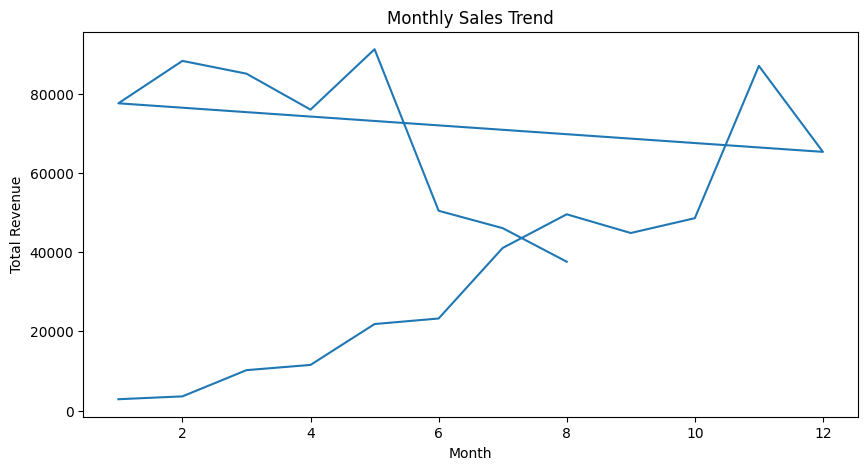

In [16]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["Month"], monthly_sales["Revenue"])
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Monthly Sales Trend")
plt.savefig("../visuals/monthly_revenue.png", dpi=300, bbox_inches="tight")
plt.show()


Sales show noticeable variation across months, indicating seasonal demand patterns. Revenue peaks during specific months, suggesting opportunities for targeted promotions

# Top Products by Revenue


In [17]:
top_products = (
    df.groupby("Product")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products


Product
health2       63885.00
health5       54730.20
computers4    46916.51
bed2          42938.66
computers6    41082.60
watches6      37683.42
furniture2    37608.90
watches1      31786.82
watches7      31623.81
watches5      30467.50
Name: Revenue, dtype: float64

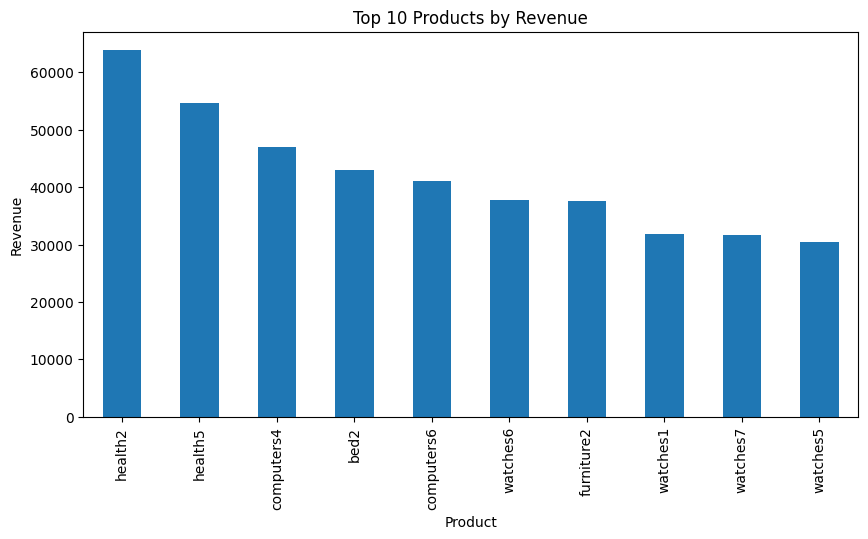

In [18]:
top_products.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.savefig("../visuals/revenue_by_top_products.png", dpi=300, bbox_inches="tight")
plt.show()


A small number of products contribute disproportionately to total revenue, indicating a classic Pareto effect. Prioritizing inventory and marketing for these products can maximize profits.

# Category-wise Revenue


In [19]:
category_sales = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

category_sales


Category
health_beauty            212409.24
watches_gifts            207582.17
garden_tools             163582.54
computers_accessories    142097.95
bed_bath_table            95084.52
cool_stuff                57956.30
furniture_decor           56925.16
perfumery                 20312.52
consoles_games             5800.70
Name: Revenue, dtype: float64

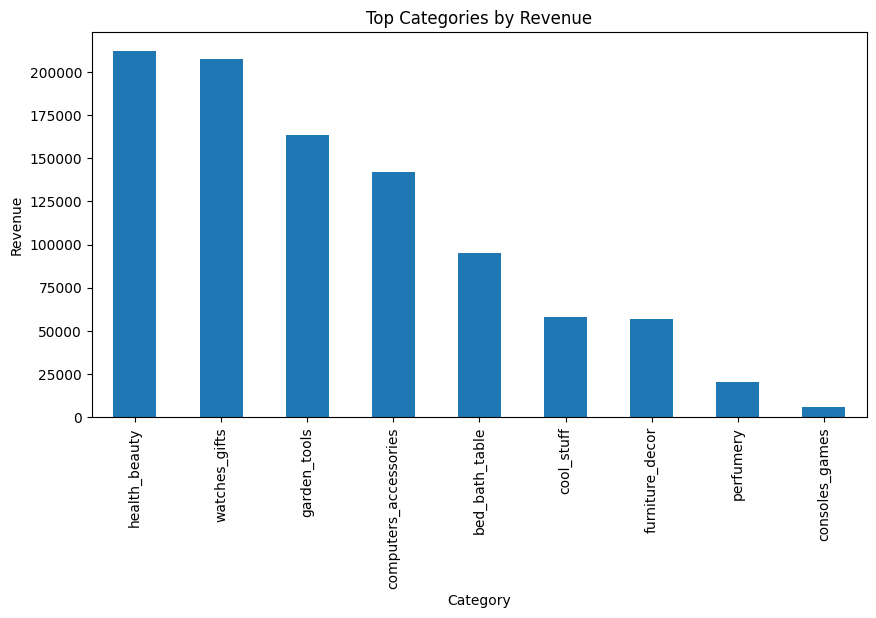

In [20]:
category_sales.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top Categories by Revenue")
plt.ylabel("Revenue")
plt.savefig("../visuals/revenue_by_category.png", dpi=300, bbox_inches="tight")
plt.show()


Certain product categories consistently outperform others, suggesting stronger customer demand. These categories should be prioritized for expansion and pricing optimization.


# Quantity vs Revenue

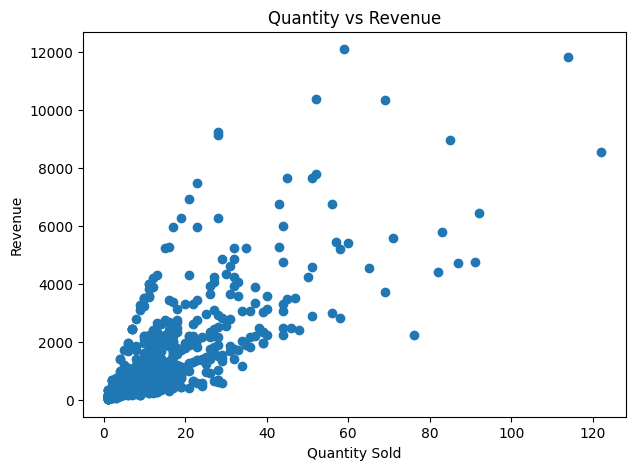

In [22]:
plt.figure(figsize=(7,5))
plt.scatter(df["Quantity"], df["Revenue"])
plt.xlabel("Quantity Sold")
plt.ylabel("Revenue")
plt.title("Quantity vs Revenue")
plt.savefig("../visuals/revenue_by_quantity.png", dpi=300, bbox_inches="tight")
plt.show()


Revenue generally increases with quantity sold, but significant dispersion indicates price variation across products. This suggests pricing strategy plays a key role alongside sales volume.

In [24]:
df["Profit"] = df["Revenue"] - df["Freight_Cost"]

df[["Revenue", "Freight_Cost", "Profit"]].describe()


,Revenue,Freight_Cost,Profit
count,676.000000,676.000000,676.000000
mean,1422.708728,20.682270,1402.026458
std,1700.123100,10.081817,1699.892384
min,19.900000,0.000000,7.770000
25%,333.700000,14.761912,316.051786
50%,807.890000,17.518472,787.493333
75%,1887.322500,22.713558,1864.776511
max,12095.000000,79.760000,12072.804068


Freight costs have a noticeable impact on overall profitability. Optimizing logistics and negotiating shipping rates could significantly improve margins.

The dataset shows a highly skewed revenue and profit distribution, where a small percentage of orders contribute disproportionately to total revenue. Freight cost remains relatively stable compared to revenue, indicating that profit margins are primarily driven by sales value rather than logistics expenses.